KELOMPOK 1

1. Rachmad Rifa’i (24060122120014) <br>
2. Dzu Sunan Muhammad (24060122120034) <br>
3. Thoriq Hadiwinata (24060122130086) <br>
4. Muhammad Fakhrell Andreaz (24060122140042) <br>
5. Farid Rahman Fadhilah (24060122140142) <br>
6. Adib Willy Kusuma Adrigantara (24060122140158)

## Import
---

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

JACOBI METHOD <br>
$x_i^{(k)}=\frac{\sum_{j=1, j \ne i}^{n}(-a_{ij}x_j^{(k-1)})+b_i}{a_{ii}}$

In [254]:
def jacobimethod(A, b):
    x = np.array([0] * len(b))
    err = np.inf
    it = 0
    while err > 1e-3:
        x_n = np.array([0.0] * len(x))
        for i in range(len(x)):
            x_n[i] = b[i]
            for j in range(len(x)):
                if i < j:
                    x_n[i] -= A[i][j]*x[j]
            x_n[i] /= A[i][i]
        err = np.linalg.norm(x_n-x, np.inf)/np.linalg.norm(x_n, np.inf)
        x = x_n
        it += 1
    return x

## Regresi Linear
---

In [255]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (1).csv


In [256]:
df1 = pd.read_csv('wine.csv')

In [257]:
df1.head(5)

,residual sugar,chlorides,free sulfur dioxide
0,1.9,0.076,11
1,2.6,0.098,25
2,2.3,0.092,15
3,1.9,0.075,17
4,1.9,0.076,11


In [258]:
x = df1['residual sugar']
y = df1['chlorides']
z = df1['free sulfur dioxide']

$\begin{bmatrix}
n & \sum_{i=1}^{n}x_i & \sum_{i=1}^{n}y_i \\
\sum_{i=1}^{n}x_i & \sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_iy_i \\
\sum_{i=1}^{n}y_i & \sum_{i=1}^{n}x_iy_i & \sum_{i=1}^{n}y_i^2
\end{bmatrix}$
$\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}$
$=$
$\begin{bmatrix}
\sum_{i=1}^{n}z_i \\
\sum_{i=1}^{n}x_iz_i \\
\sum_{i=1}^{n}y_iz_i
\end{bmatrix}$

In [259]:
A = np.array([
    [len(x), sum(x), sum(y)],
    [sum(x), sum(x**2), sum(x*y)],
    [sum(y), sum(x*y), sum(y*y)]
])
b = np.array([sum(z), sum(x*z), sum(y*z)])

In [260]:
res = jacobimethod(A, b)

In [261]:
f1 = lambda x1, x2: res[0] + res[1]*x1 + res[2]*x2

In [262]:
x1_input = float(input("Masukkan x1: "))
x2_input = float(input("Masukkan x2: "))
print("Hasil prediksi y:", f1(x1_input, x2_input))

Masukkan x1: 2
Masukkan x2: 3
Hasil prediksi y: 347.02142579846003


In [263]:
x_surf, y_surf = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
z_surf = f1(x_surf, y_surf)

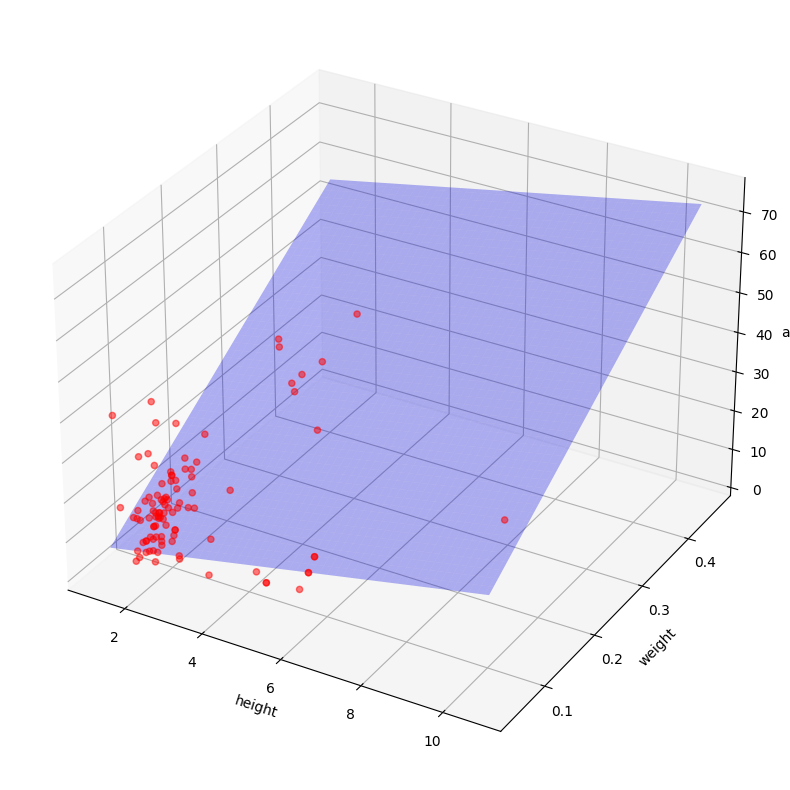

In [264]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,z_surf, color='b', alpha=0.3)
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
plt.show()

## Regresi Non Linear
---

In [265]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (6).csv


In [267]:
df2 = pd.read_csv('data.csv')

In [268]:
df2.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [269]:
x = df2['Height']
y = df2['Weight']

$\begin{bmatrix}
n & \sum_{i=1}^{n}x_i & \sum_{i=1}^{n}x_i^2 \\
\sum_{i=1}^{n}x_i  & \sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i^3\\
\sum_{i=1}^{n}x_i^2& \sum_{i=1}^{n}x_i^3 & \sum_{i=1}^{n}x_i^4
\end{bmatrix}$
$\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}$
$=$
$\begin{bmatrix}
\sum_{i=1}^{n}y_i \\
\sum_{i=1}^{n}x_iy_i \\
\sum_{i=1}^{n}x_i^2y_i
\end{bmatrix}$

In [270]:
A = np.array([
    [len(x), sum(x), sum(x**2)],
    [sum(x), sum(x**2), sum(x**3)],
    [sum(x**2), sum(x**3), sum(x**4)]
])
b = np.array([sum(y), sum(x*y), sum(x**2*y)])

In [271]:
res = jacobimethod(A, b)

In [272]:
f2 = lambda x: res[0] + res[1]*x + res[2]*x**2

In [273]:
x_surf = np.linspace(min(x), max(x), 1000)
y_surf = [f2(i) for i in x_surf]

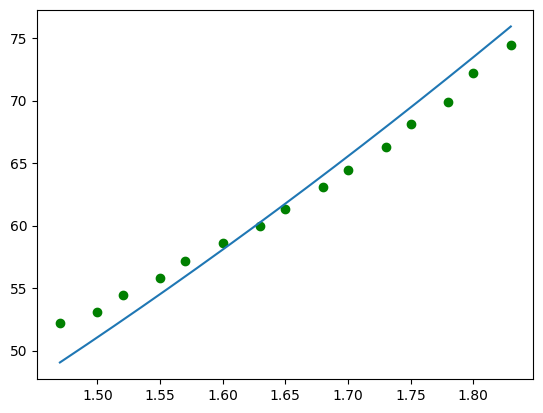

In [274]:
plt.plot(x, y, 'go')
plt.plot(x_surf, y_surf)